In [1]:
import numpy as np
import h5py
from matplotlib import pylab as plt
from tensorflow.keras import regularizers
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib.colors import SymLogNorm
import sys
import matplotlib.pyplot as plt
from Uilts import *

In [2]:
## Load 2d field data
data = np.load('Data/2dField_data.npz')

noisy_data = data['noisy_data'] # noisy data
cwt_data = data['cwt_data']  # cwt data

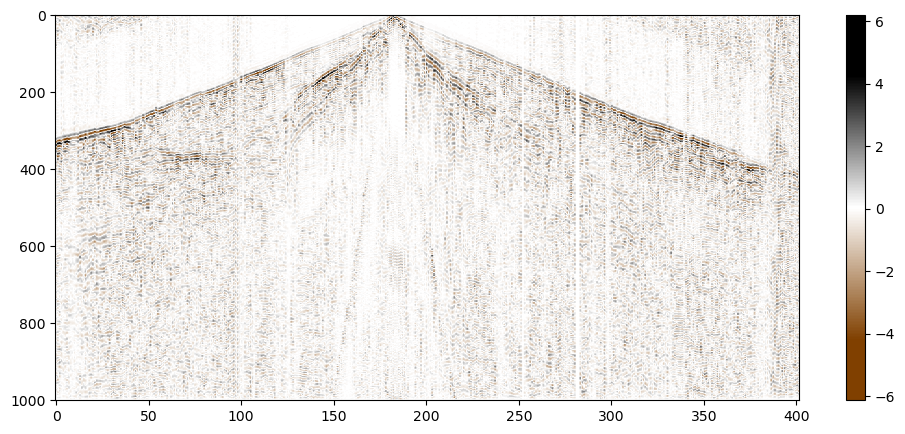

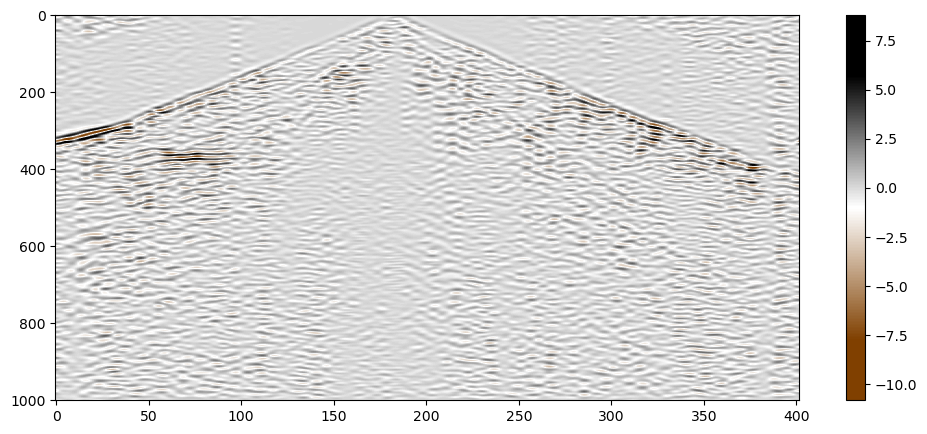

In [3]:

plt.figure(figsize=(12,5))
plt.imshow(noisy_data, cmap=cseis())
plt.axis('tight')
plt.colorbar();

plt.figure(figsize=(12,5))
plt.imshow(cwt_data, cmap=cseis())
plt.axis('tight')
plt.colorbar();
plt.show()

In [5]:
# Set the patch and shift size
w1 = 32                                  
w2 = 32
s1z = 1
s2z = 1

# Set the Number of Neurons Per First Encoder Layer.
D1 = 512
# Set the Number of Epoch and Batch Size.
epochs = 100 
batch_size = 128

# Training the Network in an Unsupervised Manner.
denoised_data = PDDNet(cwt_data,noisy_data,epochs,batch_size,w1,w2,s1z,s2z,D1)

(359870, 1024)
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_layer1 (InputLayer)      [(None, 1024, 1)]    0           []                               
                                                                                                  
 input_layer2 (InputLayer)      [(None, 1024, 1)]    0           []                               
                                                                                                  
 concatenate_11 (Concatenate)   (None, 1024, 2)      0           ['input_layer1[0][0]',           
                                                                  'input_layer2[0][0]']           
                                                                                                  
 lambda_20 (Lambda)             (None, 1024)         0           ['concatenat

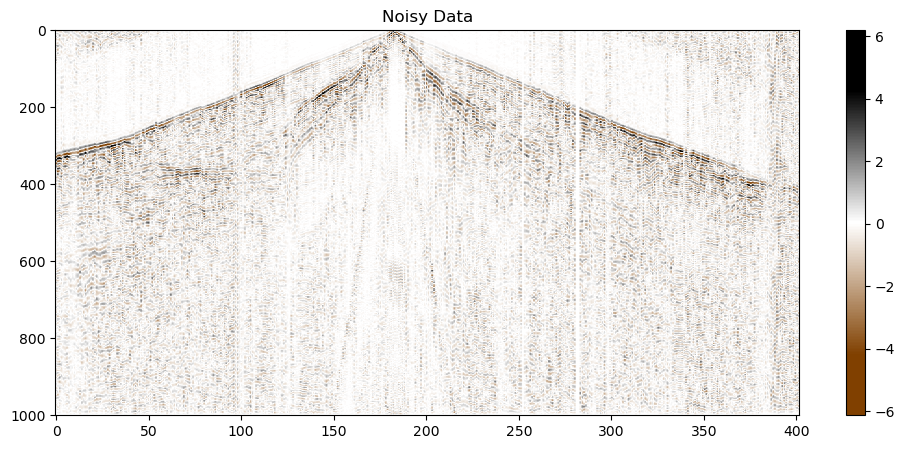

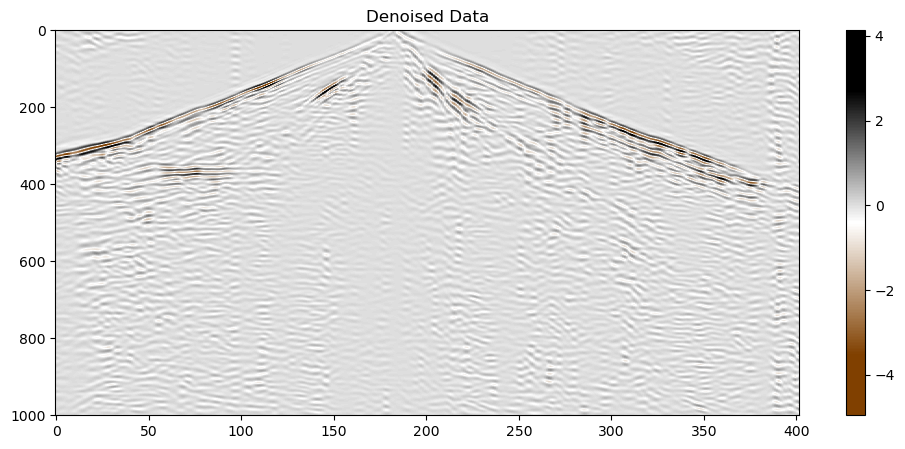

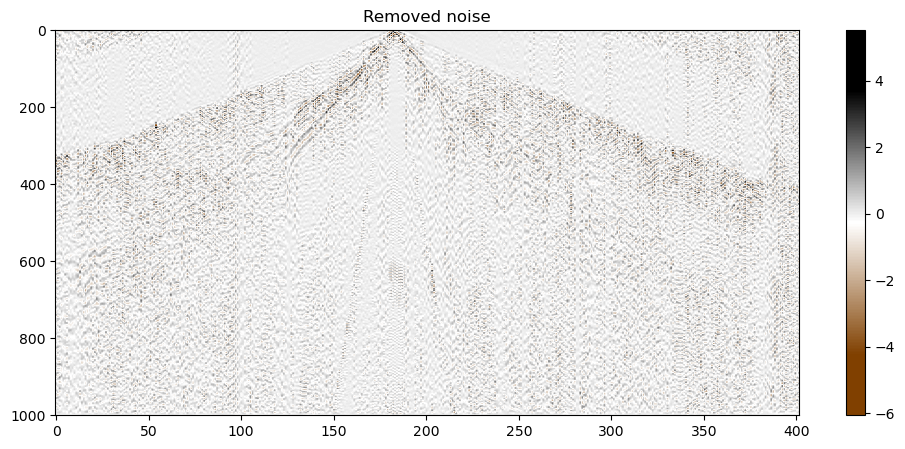

In [7]:
# Plot the processed result

plt.figure(figsize=(12, 5))
plt.imshow(noisy_data, cmap=cseis())
plt.axis('tight')
plt.colorbar()
plt.title("Noisy Data")  

plt.figure(figsize=(12, 5))
plt.imshow(denoised_data, cmap=cseis())
plt.axis('tight')
plt.colorbar()
plt.title("Denoised Data") 

plt.figure(figsize=(12, 5))
plt.imshow(noisy_data - denoised_data, cmap=cseis())
plt.axis('tight')
plt.colorbar()
plt.title("Removed noise")  

plt.show()


In [8]:
import scipy.io
scipy.io.savemat("Data/Denoised_2dfield.mat", mdict={'denoised': denoised_data})